<a href="https://colab.research.google.com/github/andreaycaceres/CPD-time-series/blob/main/Changepoint_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Changepoint Detection**

In Time Series analysis, changepoint detection is utilized in situations where we want to determine if there is a significant change in either mean, variance, or both is a dataset. If there is a significant change we want to know where or at what time step did this change occur.

Changepoint Detection is used for many different purposes, such as: anomaly detection, economics, human activity analysis, and quality control in manufacturing.

**Different Types of Changes:**


1) Mean shift - A mean shift is a changepoint of the mean of data values that follow a normal distribution with constant variance. The mean is the same throughout the segments until it hits a changepoint and there is a new mean value.

2) Variance Shift - This detects a change in the variance from data values of a normal disribution that have the same mean value throughout.




* For changes in mean only, function cpt.mean is used
* For changes in variance only, function cpt.var is used
* For changes in both mean and variance, cpt.meanvar is used

# **The Two Categories of CPD:**

Online CPD -


*  This form of changepoint detection is where analysis is done on live-streaming time series. Online CPD is usually needed for constant detection.
*   The goals for online CPD is to detect change as quickly as possible.
* Example of typical use is intrusionn detection

Offline CPD -
* This form of changepoint detection is where analysis data is received and processed at the same time
* The goal for offline CPD is to get an accurate detection of a change
* Example of its typical use is genome analysis or audiology


# **Single Changepoint Detection**

A hypothesis test can be used for detection of a single changepoint. $H_{o}$ , or the null hypothesis, is if there is no changepoint $(m=0)$ and $H_{1}$, alternative hypothesis, is if there is a single changepoint detected $(m=1)$. General likelihood ratio is what is used to approach this hypothesis test for detecting a change. We need a calculation of the Maximum Log-Likelihood from both the null and alternative hypothesis to perform this method.


Null Hypothesis $(H_{o})$ maximum log-likelihood calculation = $log p(y_{1}|\hat{\theta})$

the probability density for the data distribution is p() and $\hat{\theta}$ is the maximum log-likelihood estimator

and for the alternative hypothesis, $H_{1}$, the maximum log-likelihood for it is

$ML(\tau_{1})=log p(y_{1:\tau 1}|\hat{\theta_{1}})+log p(y_{(1+\tau 1)}|\hat{\theta_{2}})$

cosidering there is a changepoint at $\tau_{1}$, with $\tau_{1} \in (1,2,...,n-1)$

Since the maximum log-likelihood value is pretty discrete for the aternative, it is just the $max_{\tau_{1}} ML(\tau_{1})$ where the maximum log-likelihood goes through each possible changepoint location making the test statistic...


$\lambda =2\bigg{[}$ max$\tau_{1}ML(\tau_{1})-log p(y_{1:n}|\hat{\theta})\bigg{]}$

a threshold, c, is used to determine if we reject the null hypothesis. If $\lambda > c$ then we reject $H_{o}$ and say that there is a detection of a changepoint and then we can estimate its location as $\hat{\tau_{1}}$ the value of $\tau_{1}$ that maximized $ML(\tau_{1})$

An issue we face is identifying the maximum of $ML(\tau:m)$ over all possible combinations of $\tau_{1:m}$

# **Multiple Changepoint Detection**

In order to efficiently analyze a growing set of time series data, we need to be able to detect multiple changepoints and their locations. In order to identify these changepoints we need to minimize

$\sum_{i=1}^{m+1}(C(y_{\tau_{i-1}+1}):\tau_{1})+\beta f(m)$

where C is a cost function for a segment (negative likelihood) and $\beta f(m)$ is the penalty to stop from overfitting. This is the process that that changepoint package uses for multiple changepoint detection.

# **Packages**

For changepoint detection there are various packages you could use but I believe these two are best for basic analysis and discussion.

In [ ]:
install.packages("changepoint");library(changepoint)
install.packages("changepoint.np");library(changepoint.np)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Successfully loaded changepoint package version 2.2.4
 See NEWS for details of changes.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Rdpack’




Some other CRAN packages that can be used for changepoint detection are:

bcp - bayesian changepoint detection

EnvCpt - used to test between changes of mean/standard deviation/AR(1) structure

strucchange - to detect changes in regression

In this project, I will only be introducing the basics of changepoint detection and how to access them in R with packages, changepoint and changepoint.np

# **Example Code and its Components:**
cpt.mean(data, penalty=" ", pen.value=, method=, Q=, test.stat=" ", class=" ", param.estimates=,minseglen=)

**data** - vector or time series object

**penalty** - cut-off point (MBIC, SIC, BIC, AIC, Hannah-Quinn, Asympotic, Manual)

AIC in a changepoint context is not a consitent estimator for the number of changes; it overestimates the number of changes but it is still commonly used. In this presentation it will not be used.

**pen.value** - Type 1 error for Asymptoticm, or number/character for manual input

**method** - AMOC, PELT, SegNeigh, BinSeg

AMOC is used when you want just one single changepoint from the data.
PELT, SegNeg, and BinSeg are used for to see multiple changepoints but through different ways.

**Q** - maximum number of changes for SegNeigh or BinSeg

**test.stat** - Test statistic, Normal or Cumulative Sum (cumsum)

test.stat is what assumptions are being made about the data

**class** - return a cpt object or not (TRUE/FALSE)

**param.estimates** - for parameter estimates to be returned or not (TRUE/FALSE)

**minseglen** - minimum number of points between changes

**Example of a change in mean at 100 in simulated normal data**

In [ ]:
#Ex 1
set.seed(1)
x=c(rnorm(100,0,1),rnorm(100,10,1))
cpt.mean(x,penalty="SIC",method="AMOC",class=FALSE)
ans=cpt.mean(x,penalty="Asymptotic",pen.value=0.01,method="AMOC")
cpts(ans)
cpt.mean(x,penalty="Manual",pen.value=0.8,method="AMOC",test.stat="CUSUM")

cpt conf.value 
       100          1

[1] 100

Warning message in cpt.mean(x, penalty = "Manual", pen.value = 0.8, method = "AMOC", :
“Traditional penalty values are not appropriate for the CUSUM test statistic”


Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Tue Dec 13 06:29:00 2022 

summary(.)  :
----------
Created Using changepoint version 2.2.4 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : CUSUM 
Type of penalty       : Manual with value, 0.8 
Minimum Segment Length :  
Maximum no. of cpts   : 1 
Changepoint Locations : 101 

This returns 100 to show that the null hypothesis
was rejected and the change in mean is at 100 and we are 99% confident of this result

**Another example:**
# **Finding a Single Changepoint**

[1] 100

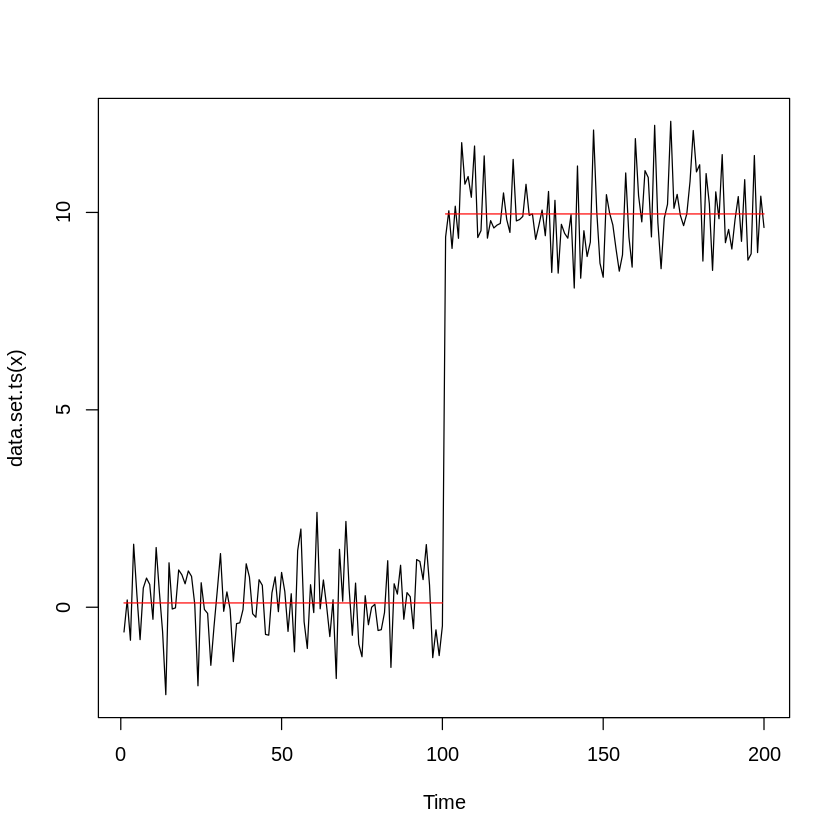

In [ ]:
#Ex 2 :)
set.seed(1)
x=c(rnorm(100,0,1),rnorm(100,10,1))
x.amoc=cpt.mean(x)
cpts(x.amoc)
plot(x.amoc)

The single changepoint here is 100

Task: Weekly number of appointments from NHS Digital between November 17th and November 18th.

Please click [here](https://github.com/organiccaprisunn/final-project-time-series/blob/main/GPvisitsWeekNov1718.Rdata) to download data as .Rdata. Once you load it into your files the next code will import it.

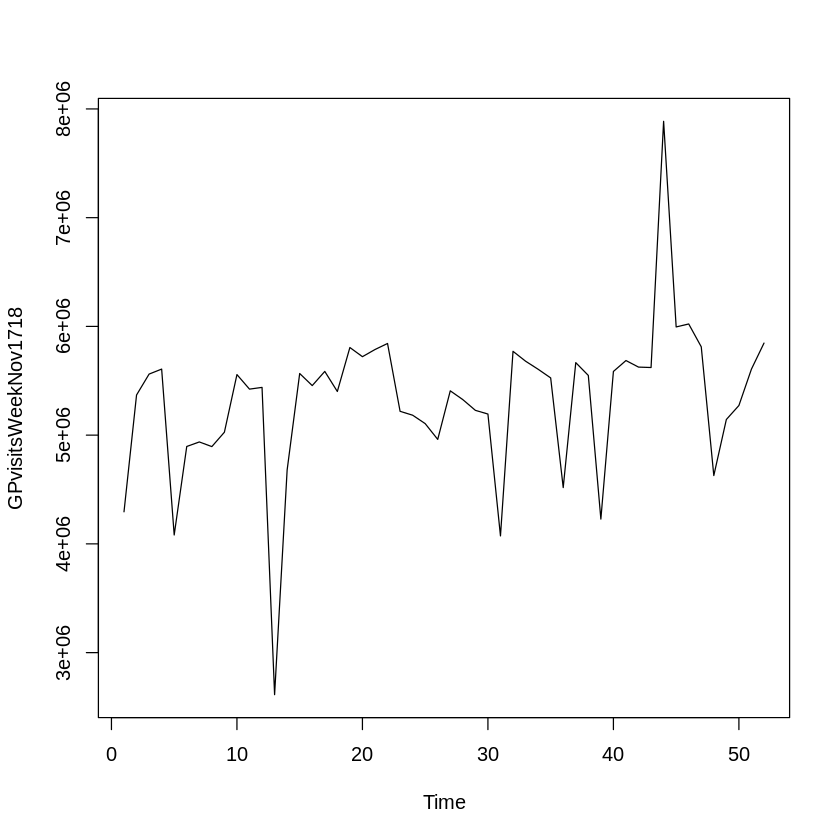

In [ ]:
#Ex 3
load('GPvisitsWeekNov1718.Rdata')
ts.plot(GPvisitsWeekNov1718)

-plots the original data with the fitted mean line with a change at 100

In [ ]:
GP.default<-cpt.mean(GPvisitsWeekNov1718)
cpts(GP.default)
param.est(GP.default)

[1] 14

$mean
[1] 4884362 5477487

Changepoint is at observation 14. After observation 14 the mean is different. The parameter estimates show the mean values before and after the change. Before the change the mean is 4884361.79 and after the change the mean is 5477486.87.

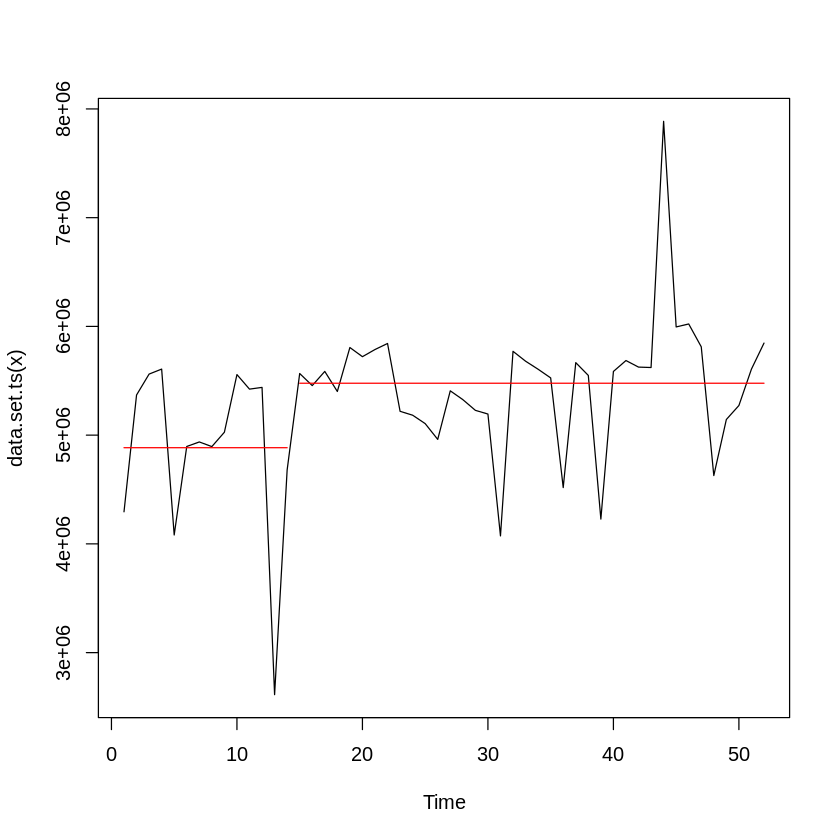

In [ ]:
plot(GP.default)

From looking at the plot we can see that the variance does not seem to be one. Let's see what happens when we scale the data using the code below.


In [ ]:
GP.scale<-cpt.mean(as.vector(scale(GPvisitsWeekNov1718)))
cpts(GP.scale)

numeric(0)

We get no changepoints after this code, but the reason as to why we got changepoints in the previous code is because it assumes the variance is equal to 1. The reason this is is because the default function only shows one changepoint with variance being 1. So this code gives no changepoint because the variance is not 1 after the data is scaled.

# **Finding Variance Changepoints**

code:

cpt.var(data, penalty, pen.value, know.mean= , mu= , method, Q, test.stat=" ", class, param.estimates, minseglen=2 )

There are only a few differences between cpt.var and cpt.mean:

know.mean=TRUE or FALSE

-if the mean is known or not determines whether is it counted as an estimated parameter

mu=

-where the mean is stated if it is known

test.stat=Normal or Cumulative Sum of Squares

-If it is normal then an assumption is made that the mean is constant and it is just the variance that is changing

In [ ]:
#Ex 4 :)
set.seed(2)
var1<-c(rnorm(100,0,1),rnorm(100,0,2),rnorm(100,0,9),rnorm(100,0,8))
var1.man<-cpt.var(var1,method='PELT',penalty='Manual',pen.value='10')
cpts(var1.man)
param.est(var1.man)

[1] 103 201

$variance
[1]  1.345888  3.941834 71.563548

$mean
[1] 0.9567323

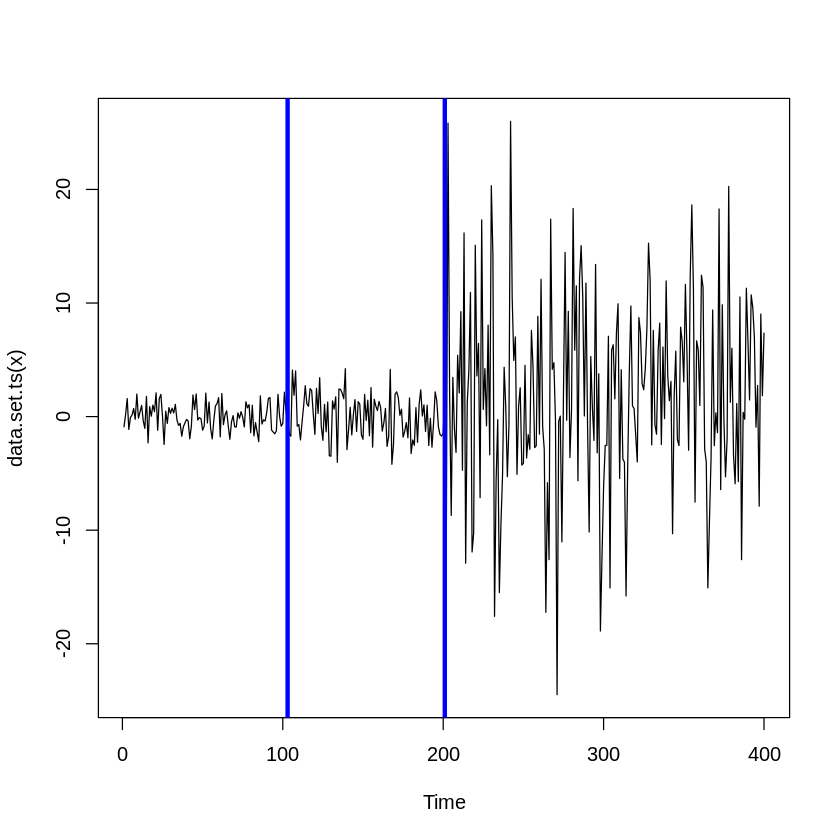

In [ ]:
plot(var1.man,cpt.width=3.5,cpt.col="blue")

This plot shows the ratio of the true variances.


**Analysis:**

Here we have changed the method to PELT to have multiple changepoints, rather than the default which would return just one. For penalty we are going to manually put in a penalty value, it can either be a number or text but I have put 10.


* changepoints are located at 103 and 201, but there is not a third one because it is too small to identify

* Since there is no third changepoint, the last variance estimate of 71.56354 is kind of between the last two inputs of variances, 8 and 9.

* The mean estimated is 0.9567



# **Finding Muliple Changepoints**

Issues faced:

We do not know how many changepoints $(m)$ there are and where they are. For $n$, the number of possible solutions are $2^{n-1}$. If we know $m$, there are still $\binom{n-1}{m}$ solutions for the optimal changepoint.



# **Different Methods for Multiple CPD Detection** :)
To get an approximate but fast solution, binary segmentation is the best. Issue with this process is that if it finds an incorrect changepoint it alters the rest of them found after it.

**Binary segmentation process:**

-checks every single changepoint location

-finds the best one

-splits the data at that point

-looks only before and after that point

-continues this process and finds as many changepoints as you set the maximum to.

To get an exact answer but takes a long time, segment neighborhood is the best.

**Segment Neighborhood Process:**

-finds best single changepoint

-from that, finds two best changepoints

-from those two, finds best three....

-from last changepoints, finds until maximum changepoint limit is reached


To get a fast and exact answer, Pruned Exact Linear Time (PELT) is the best.

**Pruned Exact Linear Time Process:**

-chooses penalty

-notes where last changepoint is from start to end of data

# **Finding Mean and Variance Changepoints**

We can find mean and variance changepoints using cpt.meanvar function:

cpt.meanvar(data, penalty, pen.value, method, Q, test.stat=" ", class, param.estimates, shape = , minseglen= )

There a slight differences between cpt.meanvar and cpt.mean/cpt.var:

**test.stat** = Either Normal, Gamma, Poisson, or Exponential; with exponential, gamma, and poisson you must have both mean and variance changing, not one or the other

**shape** - shape parameter if test.stat = Gamma

**minseglen** = minimum of 2

**Example for Mean and Variance Changepoints:**

In [ ]:
#Ex 5 :)
set.seed(3)
meanvar1<-c(rexp(60,rate=1),rexp(60,5),rexp(60,2),rexp(60,7))
meanvar1.pelt<-cpt.meanvar(meanvar1,test.stat='Exponential',method='BinSeg',Q=10,penalty="SIC")
cpts(meanvar1.pelt)

[1]  60 133 184

In [ ]:
param.est(meanvar1.pelt)

$rate
[1] 0.9754623 4.5618093 2.0465011 7.6753783

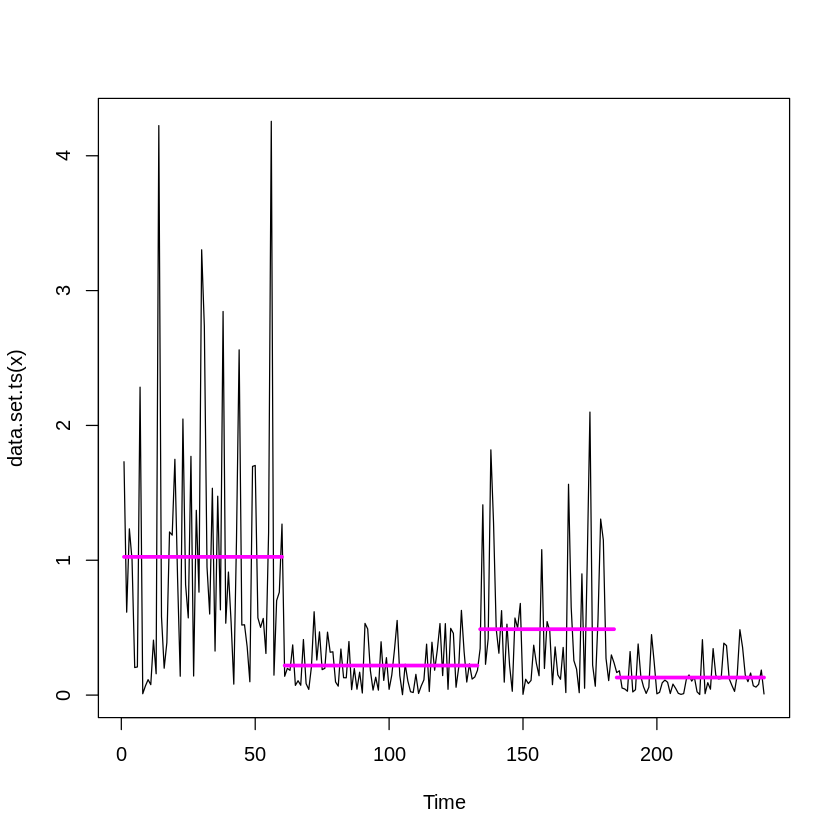

In [ ]:
plot(meanvar1.pelt,cpt.width=3,cpt.col="magenta")

# **Examples Using cpt.meanvar**

In [ ]:
#Ex 6
set.seed(1)
x<-c(rgamma(100,shape=1,rate=1),rgamma(100,shape=1,rate=5))
cpt.meanvar(x,penalty="SIC",method="AMOC",test.stat="Gamma",class=FALSE,shape=1)

cpt 
 98

The code returns 98 which shows that there is a changepoint and it is at 98. Since we used AMOC method it returns a singular changepoint.


In [ ]:
#Ex 7
set.seed(5010)
x<-c(rnorm(100,0,1),rnorm(100,5,3),rnorm(100,10,1),rnorm(100,3,10))
cpt.meanvar(x,penalty="Manual",pen.value="4*log(n)",method="BinSeg",Q=5,class=FALSE)

[1] 100 200 298 306 400

The code returns that the optimal number of changepoints is 5 and their locations are 100, 200, 298, 306, and 400

# **Example on Multiple Changepoints using Data on Human Chromosome 1:**

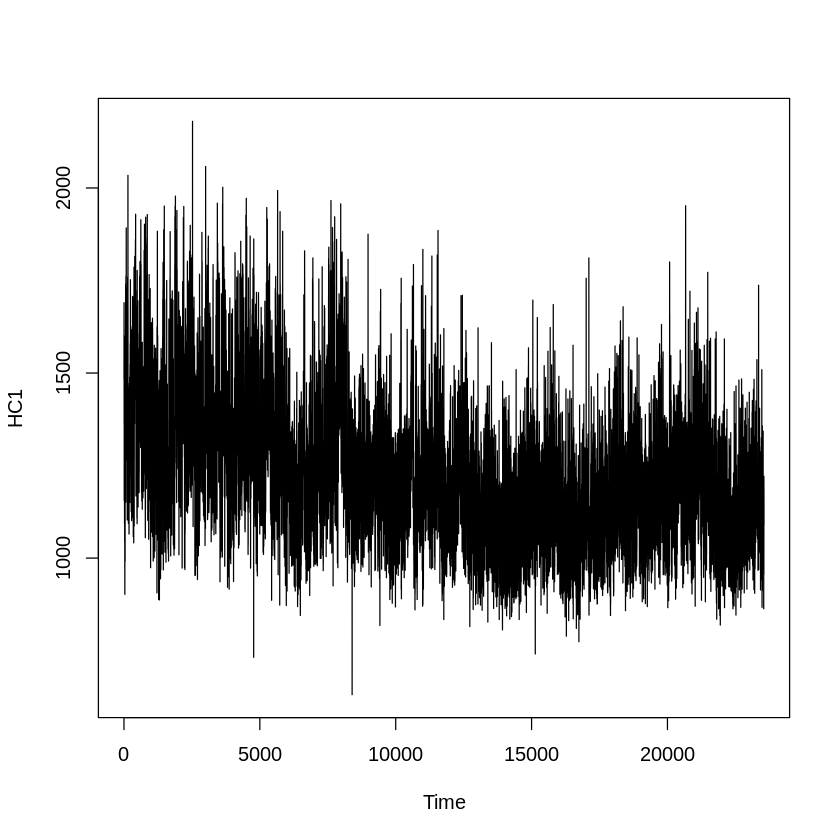

In [ ]:
#Ex 8
data(HC1)
ts.plot(HC1)

**Here we are dealing with a lot more data.** This dataset has 25,000 data points on GC content within human chromosome 1. The data is from the National Center for Biotechnology. GC content, or guanine-cytosine content, is the ratio of nitrogenous bases in DNA/RNA. The reason as to why the amount of GC content is important is because in DNA extraction heat is used to break up DNA. The more GC content there is the more heat must be used for extraction, this is because GC makes the bonds stronger in DNA.

The goal here is to identify the locations with different GC content.

In [ ]:
hc1.pelt<-cpt.meanvar(HC1,method='PELT',penalty = 'Manual',pen.value = 14)
ncpts(hc1.pelt)

[1] 805

There are **805** changepoints. This may seem a lot but let's remember there are 25,000 data points in this set.

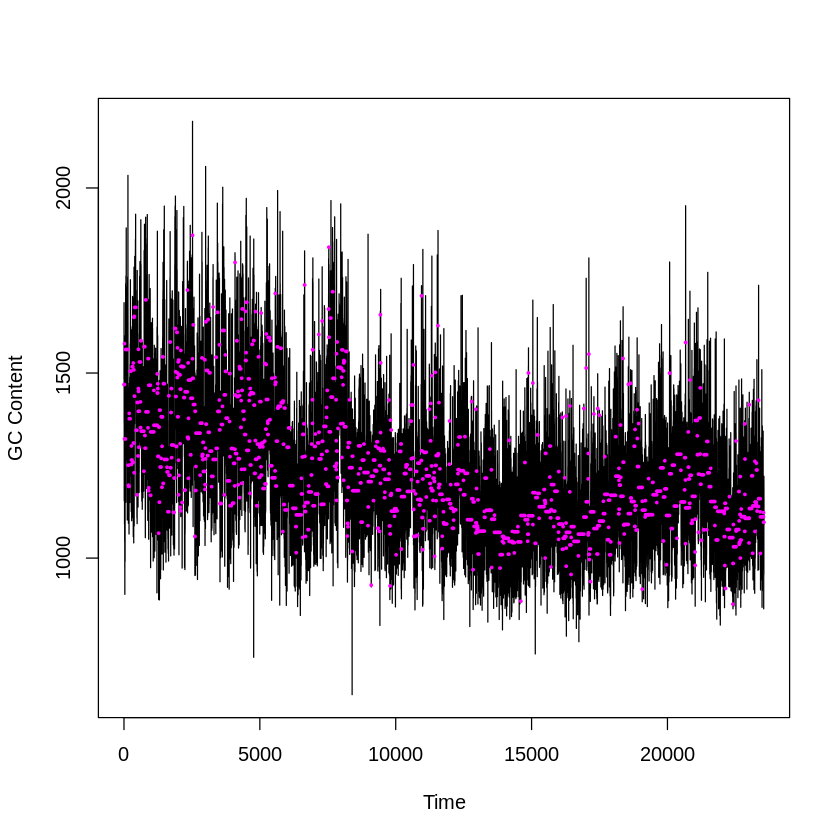

In [ ]:
plot(hc1.pelt,ylab="GC Content",cpt.width=3,cpt.col="magenta")

Looking at this data, the change in mean and variance looks grand but if we change the x limit and zoom in the fit is not as drastic.

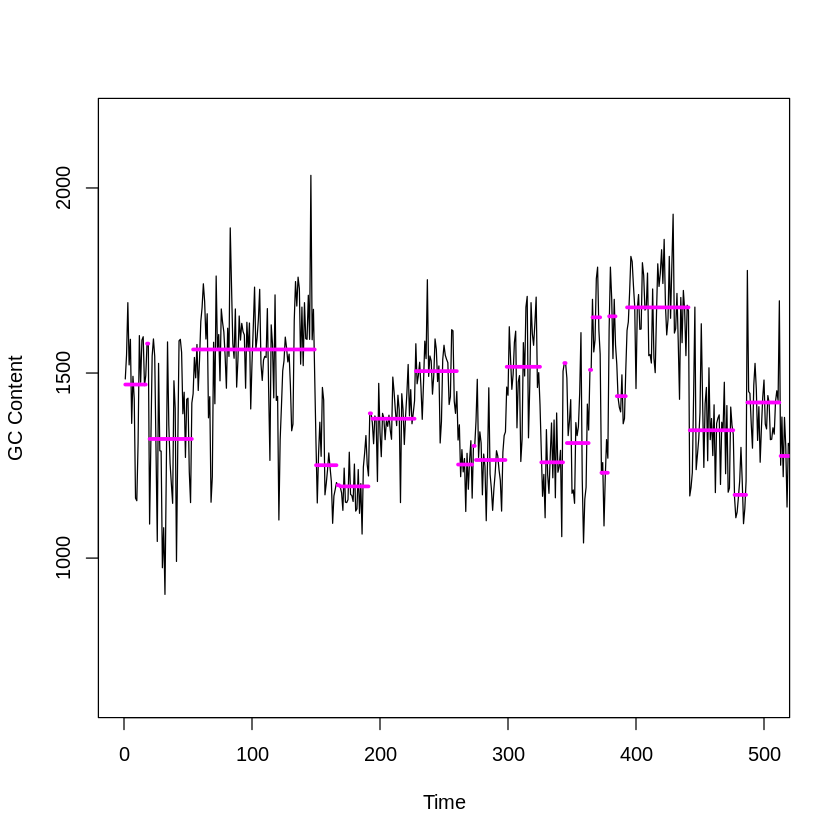

In [ ]:
plot(hc1.pelt,ylab="GC Content",cpt.width=3,cpt.col="magenta",xlim = c(0,500))

We wanna go further and decide whether 805 changes is reasonable to make inferences on. CROPS, or Changepoints for a range of penalties, will give us all the segmentations in between the changepoints. For the sake of time, I will use example #4 from the cpt.var section.

In [ ]:
var1.crops<-cpt.var(var1,method="PELT",penalty = "CROPS",pen.value = c(5,100))

[1] "Maximum number of runs of algorithm = 12"
[1] "Completed runs = 2"
[1] "Completed runs = 3"
[1] "Completed runs = 5"
[1] "Completed runs = 8"
[1] "Completed runs = 10"
[1] "Completed runs = 11"


Lower penalty values mean you are more likely to have a changepoint and a larger penalty value means you are less likely to have a changepoint. The closer the penalty value is to zero means you dont have restrictions on the number of parameters in the model. The more parameters the better your fit will be.

In [ ]:
cpts.full(var1.crops)

76,79,114,116,156,161,201,243,260,317,319
76,79,156,161,201,243,260,317,319,NA,NA
76,79,156,161,201,317,319,NA,NA,NA,NA
76,79,201,317,319,NA,NA,NA,NA,NA,NA
103,201,317,319,NA,NA,NA,NA,NA,NA,NA
103,201,NA,NA,NA,NA,NA,NA,NA,NA,NA
201,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


So for penalty value set to 5, we are given that the optimal number of changepoints is 11. For 100 set as the penalty value, we can see that the optimal number of changepoints is 1. The remaining values of changepoints are just different options.

In [ ]:
pen.value.full(var1.crops)

[1]  5.000000  5.007332  6.332894  6.842744  7.315394  8.978770 13.192935

From this we can see here that after 13.2, there are no more changepoints. Between 8.98 and 13.2 there is only one changepoint. Between 8.98 and 7.32 there are two; between 7.32 and 6.84 there are three; between 6.84 and 6.33 there are 4; and between 6.33 and 5 there are 5.

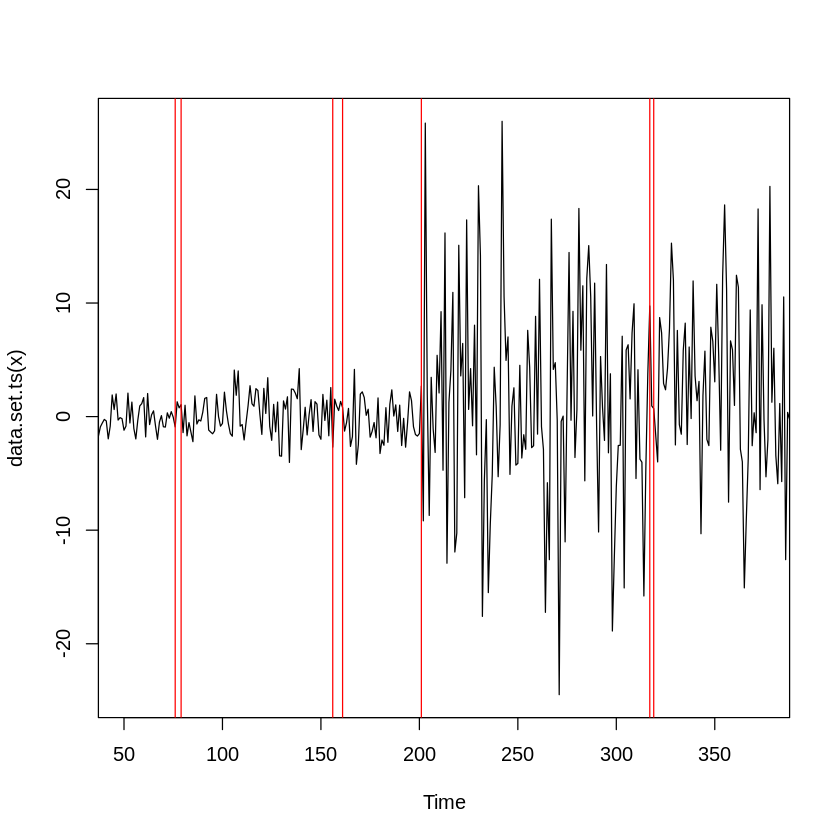

In [ ]:
plot(var1.crops,ncpts=7,xlim = c(50,375))

From this plot we can see the seven changepoints.

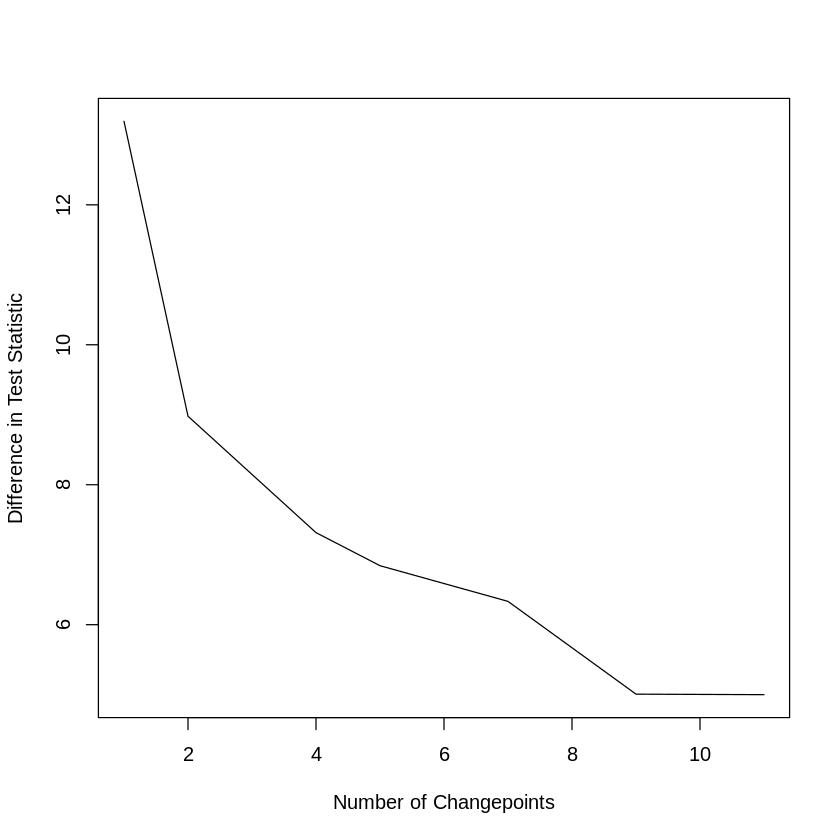

In [ ]:
plot(var1.crops,diagnostic=TRUE)

**Analysis:** A diagnostic plot shows us which number of changepoints might be the best. The steeper the decrease is between changepoints, the more significant it is. From this one here, we can see that changepoint values between 2 and 4 are optimal for deciding where the most important changes are happening.

**Sources:**

“How Change Point Detection Works.” How Change Point Detection Works-ArcGIS Pro | Documentation, https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/how-change-point-detection-works.htm.

Killick, Rebecca, and Idris A. Eckley. “Journal of Statistical Software.” Changepoint: An R Package, June 2014, https://support.microsoft.com/en-us/windows/download-files-from-the-web-abb92c09-af3a-bd99-d279-a89848b54b0b.

kperry2215. “A Brief Introduction to Change Point Detection Using Python.” Tech Rando, 6 Nov. 2019, https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/.

“Methods for Changepoint Detection [R Package Changepoint Version 2.2.4].” The Comprehensive R Archive Network, Comprehensive R Archive Network (CRAN), 3 Nov. 2022, https://cran.r-project.org/web/packages/changepoint/.

“NHS-R Workshop: Introduction to Changepoint Analysis - November 2021.” YouTube, YouTube, 3 Dec. 2021, https://www.youtube.com/watch?v=UfGrLJ7S3sc&amp;t=1205s.
